In [1]:
import pandas as pd

In [3]:
with open('res.csv') as f0:
    with open('responses.csv', 'w') as f1:
        f1.write('id,ip,controller,item,element,label,square,element-type,element-name,parameter,value,event-time,none,situation,count,comment\n')
        for line in f0.readlines():
            if (line.count('Selector')) and (line.count(',') == 15):
                f1.write(line)

In [4]:
with open('res.csv') as f0:
    with open('age.csv', 'w') as f1:
        f1.write('id,age\n')
        for line in f0.readlines():
            if line.count('age,'):
                cropped = line[line.find('Final') + 6:]
                cropped = cropped[:cropped.find(',')]
                f1.write(line[:line.find(',')] + ',' + cropped + '\n')

In [5]:
with open('res.csv') as f0:
    with open('linguist.csv', 'w') as f1:
        f1.write('id,linguist\n')
        for line in f0.readlines():
            if line.count('linguist,'):
                cropped = line[line.find('Choice') + 7:]
                cropped = cropped[:cropped.find(',')]
                f1.write(line[:line.find(',')] + ',' + cropped + '\n')

In [10]:
res = pd.read_csv('responses.csv')
age = pd.read_csv('age.csv')
linguist = pd.read_csv('linguist.csv')

In [11]:
res = res.set_index('id').join(age.set_index('id')).join(linguist.set_index('id'))
res.head()

ip      controller  item  element  \
id                                                                            
1703510943  01e4e560e10a506fc06f2549c1d0d37d  PennController    11        0   
1703510943  01e4e560e10a506fc06f2549c1d0d37d  PennController    12        0   
1703510943  01e4e560e10a506fc06f2549c1d0d37d  PennController    18        0   
1703510943  01e4e560e10a506fc06f2549c1d0d37d  PennController     3        0   
1703510943  01e4e560e10a506fc06f2549c1d0d37d  PennController     7        0   

                 label  square element-type element-name  parameter    value  \
id                                                                             
1703510943  experiment     NaN     Selector       answer  Selection  sent_vs   
1703510943  experiment     NaN     Selector       answer  Selection  sent_vs   
1703510943  experiment     NaN     Selector       answer  Selection  sent_sv   
1703510943  experiment     NaN     Selector       answer  Selection  sent_sv   
1703510943  experiment     NaN     Selector       answer  Selection  sent_sv   

               event-time       none  situation  count          comment  age  \
id                                                                             
1703510943  1703510925433  undefined     moscow      0  sent_vs;sent_sv    1   
1703510943  1703510926062  undefined     tigers      0  sent_vs;sent_sv    1   
1703510943  1703510926585  undefined     wheels      0  sent_sv;sent_vs    1   
1703510943  1703510927086  undefined  carriages      1  sent_sv;sent_vs    1   
1703510943  1703510927573  undefined      horns      0  sent_sv;sent_vs    1   

           linguist  
id                   
1703510943       да  
1703510943       да  
1703510943       да  
1703510943       да  
1703510943       да

In [12]:
res = res[res.age >= 18]
res.shape

(720, 17)

In [13]:
target_parameters = ['bows','carriages','computers','buttons','lightbulbs','horns','baskets','castles','drawers']
target = res[res.situation.isin(target_parameters)]
target = target.replace({'sent_vs': 0, 'sent_sv': 1})

In [14]:
target.head()

ip      controller  item  element  \
id                                                                            
1703514970  2ecb6ae22413454f01bdf5db98b4e6b4  PennController     7        0   
1703514970  2ecb6ae22413454f01bdf5db98b4e6b4  PennController     8        0   
1703514970  2ecb6ae22413454f01bdf5db98b4e6b4  PennController     3        0   
1703514970  2ecb6ae22413454f01bdf5db98b4e6b4  PennController     6        0   
1703514970  2ecb6ae22413454f01bdf5db98b4e6b4  PennController     2        0   

                 label  square element-type element-name  parameter  value  \
id                                                                           
1703514970  experiment     NaN     Selector       answer  Selection      0   
1703514970  experiment     NaN     Selector       answer  Selection      0   
1703514970  experiment     NaN     Selector       answer  Selection      0   
1703514970  experiment     NaN     Selector       answer  Selection      0   
1703514970  experiment     NaN     Selector       answer  Selection      0   

               event-time       none   situation  count          comment  age  \
id                                                                              
1703514970  1703514657376  undefined       horns      2  sent_sv;sent_vs   19   
1703514970  1703514679298  undefined     baskets      1  sent_vs;sent_sv   19   
1703514970  1703514722416  undefined   carriages      0  sent_sv;sent_vs   19   
1703514970  1703514756103  undefined  lightbulbs      0  sent_vs;sent_sv   19   
1703514970  1703514766880  undefined        bows      1  sent_sv;sent_vs   19   

           linguist  
id                   
1703514970       да  
1703514970       да  
1703514970       да  
1703514970       да  
1703514970       да

In [15]:
import matplotlib.pyplot as plt

In [16]:
target.groupby(['situation', 'count'])['value'].count()

situation   count
baskets     0        14
            1        16
            2        10
bows        0        14
            1        16
            2        10
buttons     0        14
            1        16
            2        10
carriages   0        16
            1        10
            2        14
castles     0        16
            1        10
            2        14
computers   0        10
            1        14
            2        16
drawers     0        10
            1        14
            2        16
horns       0        10
            1        14
            2        16
lightbulbs  0        16
            1        10
            2        14
Name: value, dtype: int64

In [17]:
stat = target.groupby(['situation', 'count'])['value'].mean()

In [18]:
legend = ['≤1', '1', '≥1']

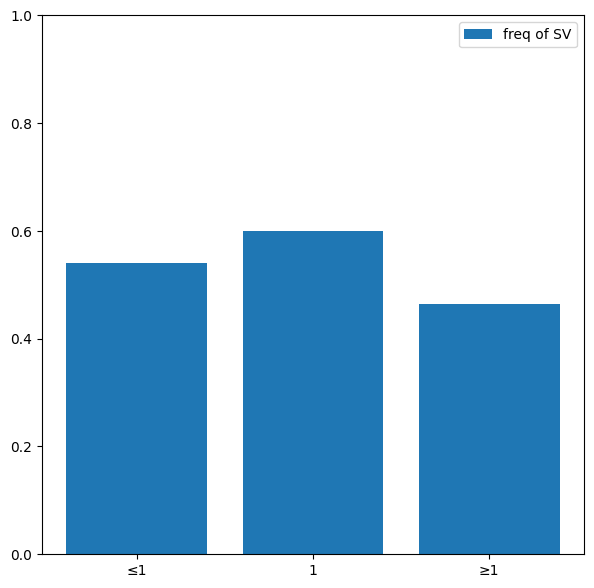

In [20]:
plt.figure(figsize=(7,7))
plt.bar(legend, stat.groupby('count').mean())
plt.ylim((0, 1))
plt.legend([r'freq of SV'])
plt.show()

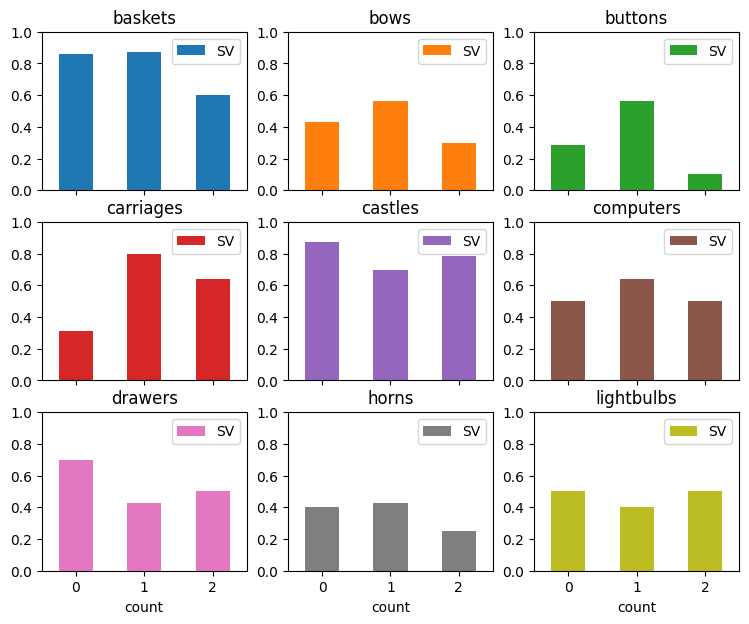

In [21]:
ax = stat.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(9, 7), layout=(3,3))
for axes in ax:
    for axis in axes:
        axis.set_ylim((0, 1))
        axis.legend(['SV'])
    

In [22]:
from scipy import stats

In [23]:
df_zero = target[target['count'] == 0]
df_one = target[target['count'] == 1]
df_two = target[target['count'] == 2]

### dumb plots

In [86]:
resps = target.groupby('id').first()

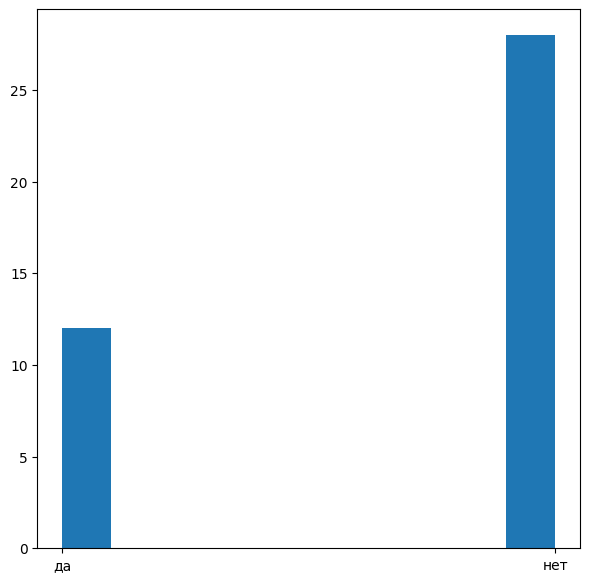

In [95]:
plt.figure(figsize=(7, 7))
plt.hist(resps.linguist)
plt.show()

### t test

In [24]:
stats.ttest_ind(df_zero['value'], df_one['value'], alternative='less')

Ttest_indResult(statistic=-0.9106740717564223, pvalue=0.18169426102110714)

In [40]:
stats.ttest_ind(df_two['value'], df_one['value'], alternative='less')

Ttest_indResult(statistic=-1.949227832839643, pvalue=0.026221503200795356)

In [26]:
stats.ttest_ind(df_two['value'], df_zero['value'], alternative='less')

Ttest_indResult(statistic=-1.0309202390160692, pvalue=0.15181235797863943)

### linreg

In [42]:
stats.linregress(df_zero['value'], df_one['value'], alternative='less')

LinregressResult(slope=0.2013986013986018, intercept=0.4909090909090907, rvalue=0.20483662259967603, pvalue=0.9875914768973308, stderr=0.08859314212220112, intercept_stderr=0.06520278713498974)

In [43]:
stats.linregress(df_two['value'], df_one['value'], alternative='less')

LinregressResult(slope=0.16040100250626532, intercept=0.523809523809524, rvalue=0.1635038238626574, pvalue=0.9628186855817653, stderr=0.08909514688568147, intercept_stderr=0.061404592412343674)

### mixed effects linreg

In [ ]:
%pip install statsmodels

In [24]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [73]:
model = smf.mixedlm("value ~ C(count, Treatment(1)) + C(situation)", target.reset_index(), groups='id', ).fit()

In [74]:
model.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                Mixed Linear Model Regression Results
======================================================================
Model:                 MixedLM      Dependent Variable:      value    
No. Observations:      360          Method:                  REML     
No. Groups:            40           Scale:                   0.1840   
Min. group size:       9            Log-Likelihood:          -242.9984
Max. group size:       9            Converged:               Yes      
Mean group size:       9.0                                            
----------------------------------------------------------------------
                            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------
Intercept                    0.860    0.081 10.626 0.000  0.701  1.018
C(count, Treatment(1))[T.0] -0.077    0.056 -1.374 0.169 -0.186  0.033
C(count, Treatment(1))[T.2] -0.132    0.056 -2.361 0.018 -0.241 -0.022
C(situation)[T.bows]        -0.350    0.096 -3.649 0.000 -0.538 -0.162
C(situation)[T.buttons]     -0.450    0.096 -4.691 0.000 -0.638 -0.262
C(situation)[T.carriages]   -0.233    0.096 -2.422 0.015 -0.422 -0.044
C(situation)[T.castles]      0.017    0.096  0.177 0.860 -0.172  0.206
C(situation)[T.computers]   -0.238    0.096 -2.473 0.013 -0.426 -0.049
C(situation)[T.drawers]     -0.263    0.096 -2.733 0.006 -0.451 -0.074
C(situation)[T.horns]       -0.438    0.096 -4.552 0.000 -0.626 -0.249
C(situation)[T.lightbulbs]  -0.308    0.096 -3.201 0.001 -0.497 -0.119
id Var                       0.044    0.036                           
======================================================================

"""

#### mixed effects logreg

In [ ]:
%pip install pymer4

In [35]:
from pymer4.models import Lmer

#### <=1

In [66]:
le_df = target[target['count'].isin([0, 1])]

In [67]:
le_model = Lmer("value ~ count + (1 | id) + (1 | situation)", data=le_df.reset_index(), family='binomial').fit()
print(le_model)

/home/retroflexivity/.local/lib/python3.9/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "event-time". Fall back to string conversion. The error is: integer 1703514679298 does not fit '32-bit int'
  warnings.warn('Error while trying to convert '


Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: value~count+(1|id)+(1|situation)

Family: binomial	 Inference: parametric

Number of observations: 240	 Groups: {'id': 40.0, 'situation': 9.0}

Log-likelihood: -152.738 	 AIC: 313.476

Random effects:

                  Name    Var    Std
id         (Intercept)  1.258  1.121
situation  (Intercept)  0.573  0.757

No random effect correlations specified

Fixed effects:

             Estimate  2.5_ci  97.5_ci     SE     OR  OR_2.5_ci  OR_97.5_ci  \
(Intercept)     0.216  -0.520    0.951  0.375  1.240      0.595       2.588   
count           0.351  -0.246    0.949  0.305  1.421      0.782       2.582   

              Prob  Prob_2.5_ci  Prob_97.5_ci  Z-stat  P-val Sig  
(Intercept)  0.554        0.373         0.721   0.574  0.566      
count        0.587        0.439         0.721   1.152  0.249      


#### >=1

In [68]:
ge_df = target[target['count'].isin([2, 1])].copy()
ge_df['count'] = ge_df['count'].replace(2, 0)

In [69]:
le_model = Lmer("value ~ count + (1 | id) + (1 | situation)", data=ge_df.reset_index(), family='binomial').fit()
print(le_model)

/home/retroflexivity/.local/lib/python3.9/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "event-time". Fall back to string conversion. The error is: integer 1703514657376 does not fit '32-bit int'
  warnings.warn('Error while trying to convert '


Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: value~count+(1|id)+(1|situation)

Family: binomial	 Inference: parametric

Number of observations: 240	 Groups: {'id': 40.0, 'situation': 9.0}

Log-likelihood: -151.812 	 AIC: 311.624

Random effects:

                  Name    Var    Std
id         (Intercept)  1.539  1.241
situation  (Intercept)  0.633  0.796

No random effect correlations specified

Fixed effects:

             Estimate  2.5_ci  97.5_ci     SE     OR  OR_2.5_ci  OR_97.5_ci  \
(Intercept)    -0.134  -0.909    0.641  0.395  0.875      0.403       1.899   
count           0.741   0.124    1.357  0.315  2.097      1.132       3.886   

              Prob  Prob_2.5_ci  Prob_97.5_ci  Z-stat  P-val Sig  
(Intercept)  0.467        0.287         0.655  -0.338  0.735      
count        0.677        0.531         0.795   2.353  0.019   *  


#### <>1

In [56]:
gl_df = target[target['count'].isin([2, 0])]

In [58]:
le_model = Lmer("value ~ count + (1 | id) + (1 | situation)", data=gl_df.reset_index(), family='binomial').fit()
print(le_model)

/home/retroflexivity/.local/lib/python3.9/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "event-time". Fall back to string conversion. The error is: integer 1703514657376 does not fit '32-bit int'
  warnings.warn('Error while trying to convert '


Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: value~count+(1|id)+(1|situation)

Family: binomial	 Inference: parametric

Number of observations: 240	 Groups: {'id': 40.0, 'situation': 9.0}

Log-likelihood: -154.172 	 AIC: 316.344

Random effects:

                  Name    Var    Std
id         (Intercept)  0.891  0.944
situation  (Intercept)  0.778  0.882

No random effect correlations specified

Fixed effects:

             Estimate  2.5_ci  97.5_ci     SE     OR  OR_2.5_ci  OR_97.5_ci  \
(Intercept)     0.210  -0.558    0.978  0.392  1.234      0.572       2.659   
count          -0.184  -0.480    0.112  0.151  0.832      0.619       1.119   

              Prob  Prob_2.5_ci  Prob_97.5_ci  Z-stat  P-val Sig  
(Intercept)  0.552        0.364         0.727   0.536  0.592      
count        0.454        0.382         0.528  -1.218  0.223      
